# Testing Space for Reversing Transfer function Algo to produce data sets.

## Algorithm:

Define functions for $ E_1 $ and $ E_2 $. These are the electric field propagations from the Fresnel model in the air (where there would be a sample) and through the sample.  
These follow the parameter relations:  
- $ E_1(n, k, d, w) \rightarrow f(w) $ 
- $ E_2(n_1, k_1, n_2, k_2, d, w) \rightarrow \tilde{f}(w) $

This gives a model of transmission in air of thickness d with refractive index $ \tilde{n} = n + ik $.

From the Fresnel model we have the following definition for the propagation of light from a refractive index of $\tilde{n}_1$ through a medium with refractive index $\tilde{n}_2$ back into $\tilde{n}_1$.  
- $E_t = E_0 \frac{4 \tilde{n}_1 \tilde{n}_2}{(\tilde{n}_1 + \tilde{n}_2)^2} e^{i(\tilde{n}_2 \frac{wd}{c})}$   
We can apply this to our current system of reference and sample pulses with the following two equations:  
- $E_1 = E_0 e^{i(\tilde{n}_1\frac{wd}{c})}$, Here $n_2 = n_1$  
- $E_2 = E_0 \frac{4 \tilde{n}_2}{(1 + \tilde{n}_2)^2} e^{i(\tilde{n}_2 \frac{wd}{c})}$, Here $n_1 = 1$ as this is air 

NB: When $\tilde{n}_1 = \tilde{n}_2$, $\frac{4 \tilde{n}_1 \tilde{n}_2}{(\tilde{n}_1 + \tilde{n}_2)^2} = 1$

Notice, When we divide the two signals we get the theoretical transfer function used in the Newton rapshon method.  
$\tilde{H}(\omega) = \frac{E_2}{E_1} =   \frac{4 \tilde{n}_1 \tilde{n}_2}{(\tilde{n}_1 + \tilde{n}_2)^2} e^{i((\tilde{n}_2 - \tilde{n}_1) \frac{wd}{c})}$  

Important to note: In this set up:  
- k > 0 the sample attenuates 
- k < 0 the sample has gain.

In [1]:
import sys
from pathlib import Path

# Set the path to the THz-TDS root (one level up from Reverse_algo)
project_root = Path.cwd().parent  # Current working directory's parent
if str(project_root) not in sys.path:
    sys.path.append(str(project_root))

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from Extraction.transfer_functions import H_th_function

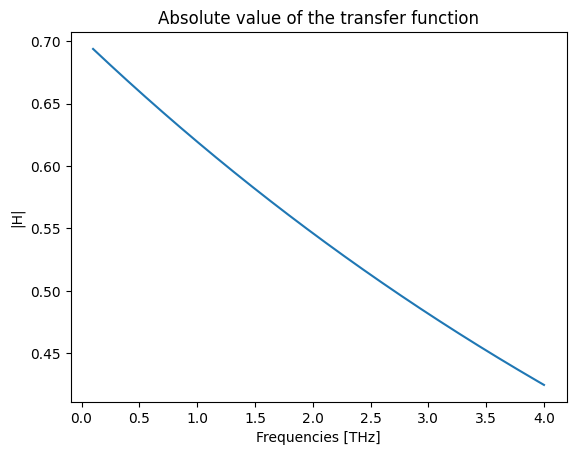

In [5]:
# Test theoretical transfer function
# set up frequency range

interp = 2**12
freqs_THz = np.linspace(0.1, 4, interp)   # 0-4 THz 
freqs = freqs_THz * 1e12
freqs_ang = freqs * 2 * np.pi

# set up other material parameters 
n = 3.4
k = 0.02
n_test = n + (k*1j)
thickness = 300 * 1e-6

# Use theoretical transfer function to generate a transfer function or defined material parameters 
H = H_th_function(n_test, freqs_ang, thickness)

plt.plot(freqs_THz, np.abs(H))
plt.title('Absolute value of the transfer function')
plt.xlabel('Frequencies [THz]')
plt.ylabel('|H|')
plt.show()

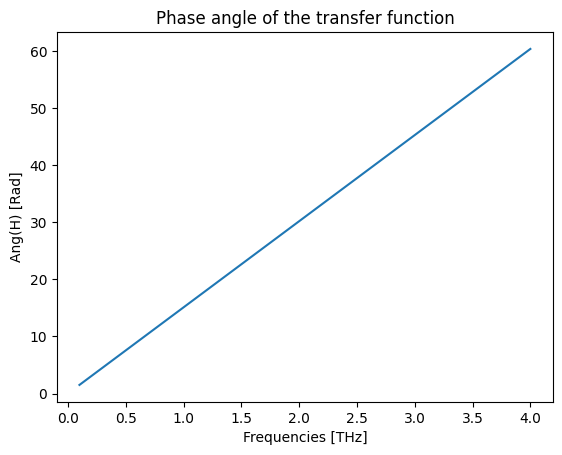

In [7]:
plt.plot(freqs_THz, np.unwrap(np.angle((H))))
plt.title('Phase angle of the transfer function')
plt.xlabel('Frequencies [THz]')
plt.ylabel('Ang(H) [Rad]')
plt.show()